<a href="https://colab.research.google.com/github/jilliangreene/sta_554_assignments/blob/main/Greene_STA554_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 4

Code from HW3:

In [2]:
import pandas as pd

In [3]:
student_data = pd.read_csv("StudentData.txt", sep = ";")
student_data.head()

#one way contingency table
tab = pd.crosstab(student_data["sex"], student_data["nursery"], margins = True)
#two way contingency table
pd.crosstab([student_data["sex"], student_data["nursery"]], student_data["higher"],
            margins=True)
#three way contingency
pd.crosstab([student_data["sex"], student_data["nursery"], student_data["higher"]],
            student_data["Medu"], margins=True)

Medu                0   1    2   3    4  All
sex nursery higher                          
F   no      no      1   0    0   1    0    2
            yes     0  15    9  10    6   40
    yes     no      0   0    2   0    0    2
            yes     1  17   49  42   55  164
M   no      no      0   1    1   2    0    4
            yes     1   6    9  10    9   35
    yes     no      0   5    4   2    1   12
            yes     0  15   29  32   60  136
All                 3  59  103  99  131  395

In [4]:
# two way contingency w subset
# Once, by subsetting the data (say with .loc) and then creating the two-way table
subset_df = student_data.loc[student_data["sex"] == "F"]
pd.crosstab(subset_df["reason"], subset_df["famsup"], margins=True)

famsup,no,yes,All
reason,,,
course,22,50,72
home,20,33,53
other,7,11,18
reputation,17,48,65
All,66,142,208


In [5]:
# Numeric variables!
#mean and sd of age, G1 and G3
print("mean ± sd age:", student_data["age"].mean(), "±", student_data["age"].std())
print("mean ± sd of grade 1:", student_data["G1"].mean(), "±", student_data["G1"].std())
print("mean ± sd of grade 3:", student_data["G3"].mean(), "±", student_data["G3"].std())

mean ± sd age: 16.696202531645568 ± 1.2760427246056245
mean ± sd of grade 1: 10.90886075949367 ± 3.3191946715076686
mean ± sd of grade 3: 10.415189873417722 ± 4.5814426109978434


In [6]:
#repeat while subsetting to only female students
subset_df = student_data.loc[student_data["sex"] == "F"]
print("mean ± sd age:", subset_df["age"].mean(), "±", subset_df["age"].std())
print("mean ± sd of grade 1:", subset_df["G1"].mean(), "±", subset_df["G1"].std())
print("mean ± sd of grade 3:", subset_df["G3"].mean(), "±", subset_df["G3"].std())

mean ± sd age: 16.73076923076923 ± 1.2016958164931697
mean ± sd of grade 1: 10.620192307692308 ± 3.23253029943296
mean ± sd of grade 3: 9.966346153846153 ± 4.622338337431135


In [7]:
#mean across 1 grouping variable
student_data.groupby("sex")[["age", "G1", "G3"]].mean()

,age,G1,G3
sex,,,
F,16.730769,10.620192,9.966346
M,16.657754,11.229947,10.914439


In [8]:
#mean across 2 groups
student_data.groupby(["sex", "nursery"])[["age", "G1", "G3"]].mean()

age         G1         G3
sex nursery                                 
F   no       16.928571  10.309524   9.095238
    yes      16.680723  10.698795  10.186747
M   no       16.897436  10.615385  10.871795
    yes      16.594595  11.391892  10.925676

In [9]:
# Correlation matrix between all num vars (age, absenses, G1, G2, G3)
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


New HW 4 content:

In [10]:
import matplotlib.pyplot as plt

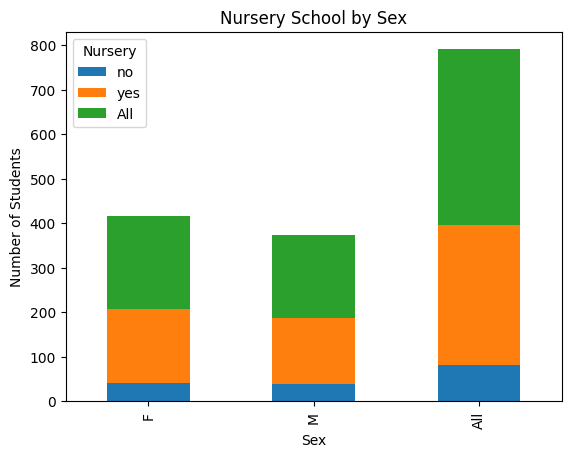

In [11]:
# Create a stacked bar graph of
tab.plot(kind="bar", stacked=True)
plt.xlabel("Sex")
plt.ylabel("Number of Students")
plt.title("Nursery School by Sex")
plt.legend(title="Nursery")
plt.show()

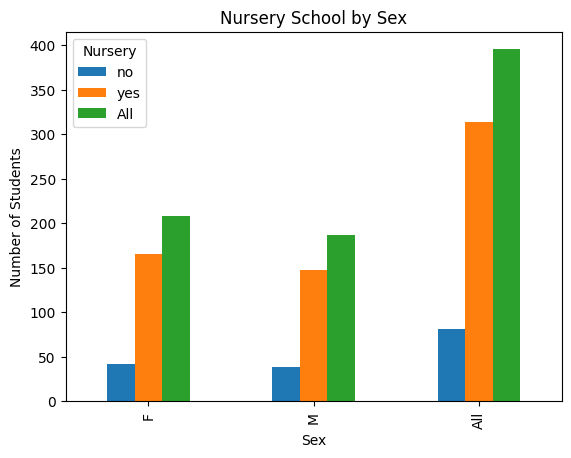

In [12]:
# Side by side bar graph w axis and plot titles
tab.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Number of Students")
plt.title("Nursery School by Sex")
plt.legend(title="Nursery")
plt.show()

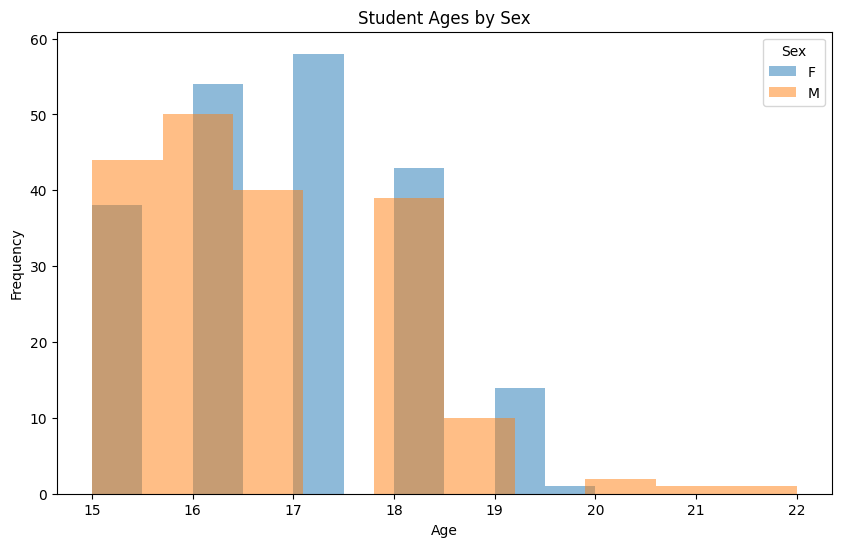

In [13]:
# Histogram of age by sex
fig, ax = plt.subplots(figsize=(10, 6))

for group_name, group_data in student_data.groupby('sex'):
    ax.hist(group_data['age'], label=group_name, alpha=0.5, bins=10)

ax.set_title('Student Ages by Sex')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(title='Sex')
plt.show()

There are more females in the middle-ages (16-18) than males

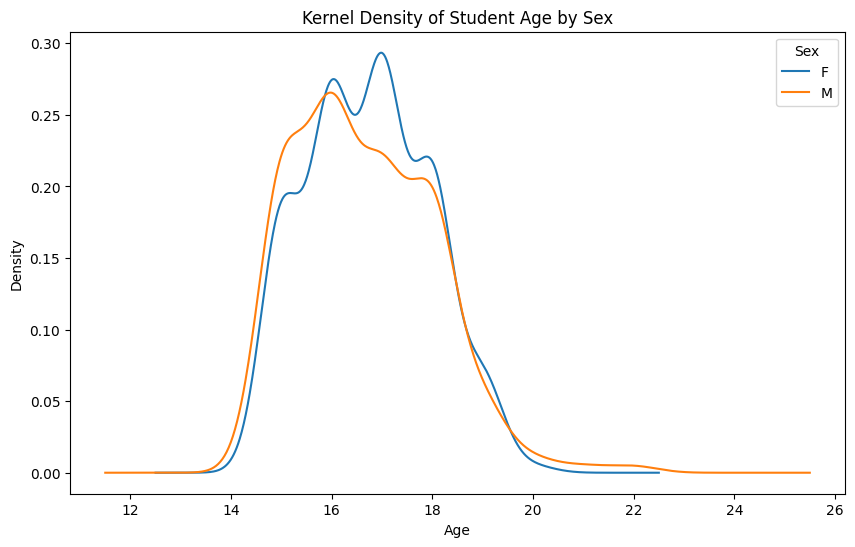

In [14]:
# Kernel density plot
fig, ax = plt.subplots(figsize=(10, 6))

for group_name, group_data in student_data.groupby('sex'):
    group_data['age'].plot(kind='density', ax=ax, label=group_name)

ax.set_title('Kernel Density of Student Age by Sex')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend(title='Sex')
plt.show()

There are more females in the middle-ages (16-18) than males

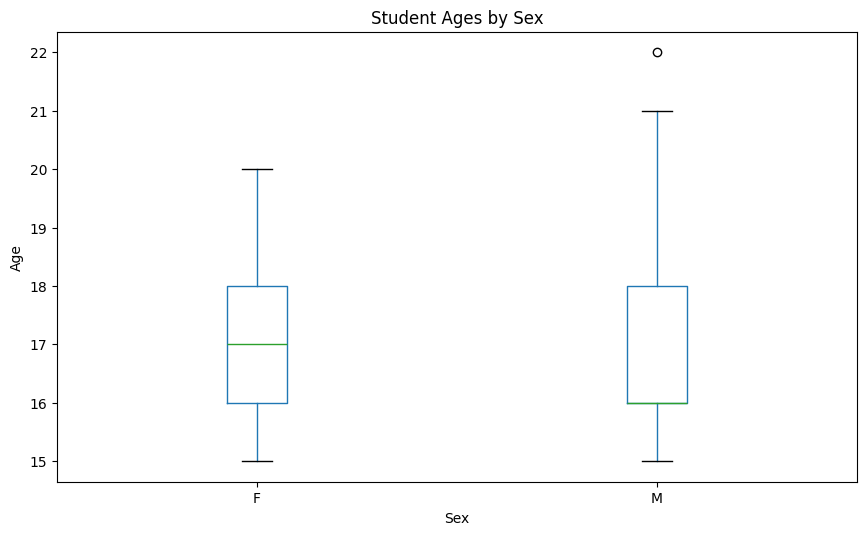

In [15]:
# Boxplot
ax = student_data.boxplot(column='age', by='sex', figsize=(10, 6))
ax.grid(False)
plt.title('Student Ages by Sex')
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


The median age for males is the same as the 25th percentile age

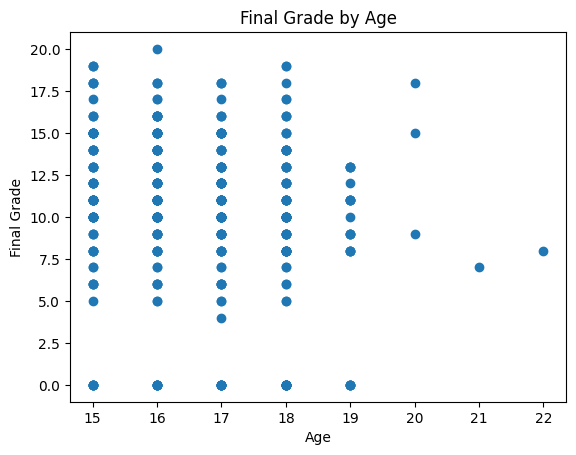

In [16]:
# Scatterplot G3 by age
plt.scatter(student_data["age"], student_data["G3"])
plt.xlabel("Age")
plt.ylabel("Final Grade")
plt.title("Final Grade by Age")
plt.show()

This scatterplot looks very interesting because the ages are just integers, so the "scatterplot" gives this bar/line look. There is a very wide range of final grades for the teens

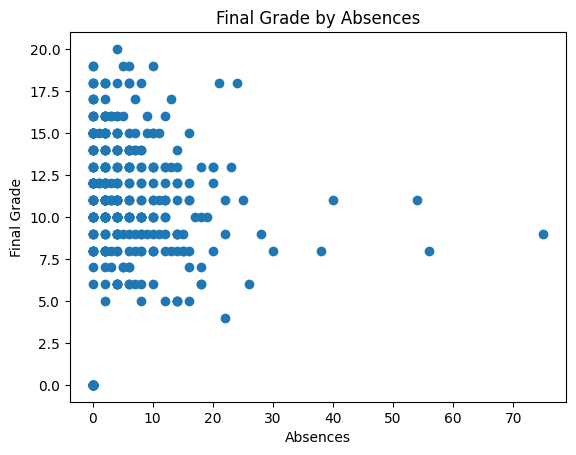

In [17]:
# Scatterplot G3 by absences
plt.scatter(student_data["absences"], student_data["G3"])
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.title("Final Grade by Absences")
plt.show()

This scatterplot shows a weak negative relationship between final grade and number of absences

## Part 2

In [18]:
nfl_data = pd.read_csv("scoresFull.csv")

#convert cols to cat.
cols_to_convert = ['homeTeam', 'awayTeam', 'day', 'stadium', 'startTime', 'toss',
                   'roof', 'surface']
nfl_data[cols_to_convert] = nfl_data[cols_to_convert].astype('category')

nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [19]:
# filter to week 1 - 17
#convert dtype
nfl_data['week'] = pd.to_numeric(nfl_data['week'], errors='coerce')
#filter
nfl_data = nfl_data[(nfl_data['week'] >= 1) & (nfl_data['week'] <= 17)]
#check week data type
nfl_data['week'].dtype

dtype('float64')

In [20]:
#summarize variables grouped by season, week, and both
nfl_data.groupby(['season', 'week'])[['HFinal', 'AFinal']].mean()

HFinal     AFinal
season week                      
2002   1.0   26.125000  23.125000
       2.0   18.187500  22.687500
       3.0   24.428571  19.571429
       4.0   28.285714  18.928571
       5.0   23.214286  24.000000
...                ...        ...
2014   13.0  27.312500  20.687500
       14.0  19.750000  27.062500
       15.0  18.437500  18.000000
       16.0  22.937500  22.875000
       17.0  20.500000  20.812500

[221 rows x 2 columns]

In [21]:
nfl_data.groupby(['season'])[['HFinal', 'AFinal']].mean()

,HFinal,AFinal
season,,
2002,22.796875,20.550781
2003,22.609375,19.054688
2004,22.738281,20.230469
2005,22.441406,18.792969
2006,21.082031,20.234375
2007,23.121094,20.253906
2008,23.308594,20.750000
2009,22.570312,20.363281
2010,22.984375,21.089844


In [22]:
nfl_data.groupby(['week'])[['HFinal', 'AFinal']].mean()

,HFinal,AFinal
week,,
1.0,22.139423,19.716346
2.0,22.840580,19.545894
3.0,22.646465,20.767677
4.0,24.092391,20.983696
5.0,24.324176,20.527473
6.0,22.988950,20.679558
7.0,23.338889,21.111111
8.0,23.359551,20.151685
9.0,22.258427,22.146067


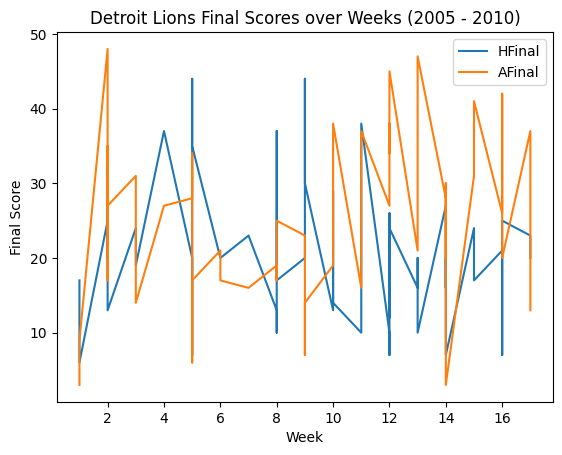

In [26]:
# line plot of HFinal vs AFinal over weeks filtered to only detroit lions in 2015 - 2020
det_lions = nfl_data[(nfl_data['homeTeam'] == 'Detroit Lions') &
 (nfl_data['season'] >= 2005) &
  (nfl_data['season'] <= 2010)]

#SORT VALUES
det_lions = det_lions.sort_values('week')
det_lions.groupby(['week'])[['HFinal', 'AFinal']].mean()
det_lions.plot(x='week', y=['HFinal', 'AFinal'], kind='line')
plt.title('Detroit Lions Final Scores over Weeks (2005 - 2010)')
plt.xlabel('Week')
plt.ylabel('Final Score')
plt.show()

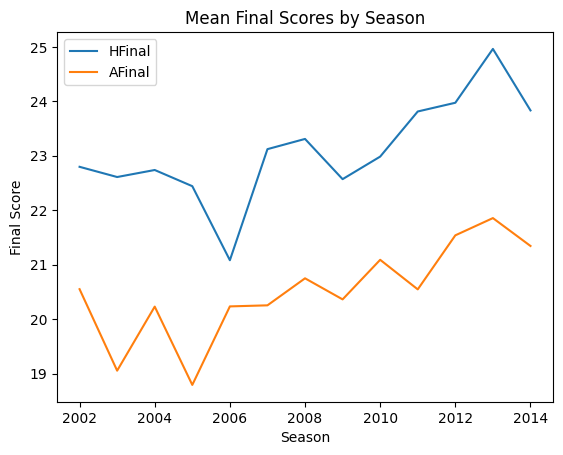

In [25]:
#plot mean HFinal and AFinal scores by season over weak
nfl_data.groupby('season')[['HFinal', 'AFinal']].mean().plot(kind='line')
plt.title('Mean Final Scores by Season')
plt.xlabel('Season')
plt.ylabel('Final Score')
plt.show()


In [38]:
# timeit decorator
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

# def plotting function
@timeit
def make_plot(df: pd.DataFrame, x_col: list[float], y_col: list[float], group: None | list[float],
              title: str = None, xlabel: str = None, ylabel: str = None):
    df.groupby(group)[[x_col, y_col]].mean().plot(kind='line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

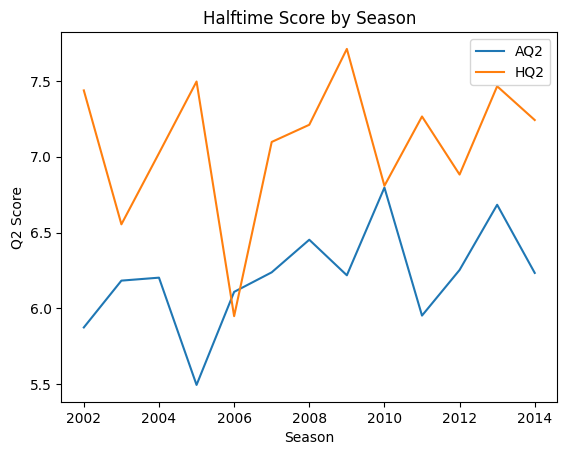

make_plot ran in 0.152424 seconds


In [39]:
#plot of halftime score over seasons
make_plot(nfl_data, 'AQ2', 'HQ2', group = 'season',
          title = "Halftime Score by Season",
          xlabel = "Season", ylabel = "Q2 Score")

Halftime scores, home or away, have generally not changed over the years. Home scores are consistantly higher.

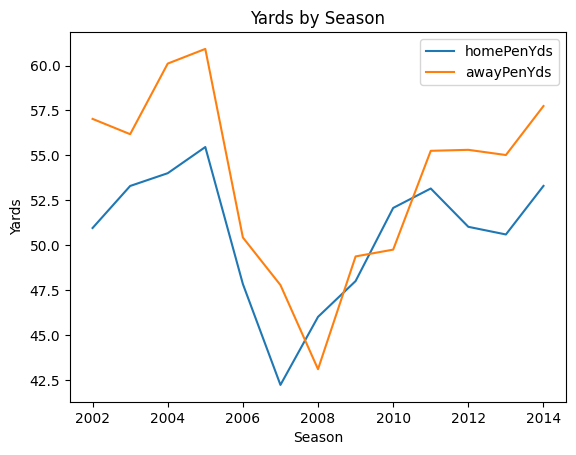

make_plot ran in 0.175957 seconds


In [40]:
make_plot(nfl_data, 'homePenYds', 'awayPenYds', group = 'season',
          title = "Yards by Season",
          xlabel = "Season", ylabel = "Yards")

Yards run both dropped dramatically beween 2006 - 2009, and there are generally low discrepancies between home vs away yards.

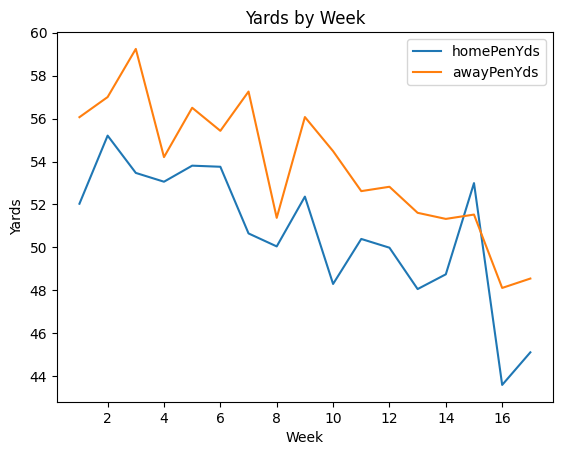

make_plot ran in 0.192200 seconds


In [41]:
make_plot(nfl_data, 'homePenYds', 'awayPenYds', group = 'week',
          title = "Yards by Week",
          xlabel = "Week", ylabel = "Yards")

Yards run by week decreases in both home and away scores throughout the season.